# Find a best line separating two sets of points.

First some facts about the distance between a point and a line.

In [1]:
import sys
if ".." not in sys.path:
    sys.path.append("..")
    
import sympy as s
s.init_printing()

x,y,a,b,c = s.symbols("x y a b c")

The squared distance between a line

In [ ]:
s.Eq(a*x + b*y + c, 0)

and the point $(x,y)$ is

In [ ]:
distance = (a*x + b*y + c)**2/(a**2 + b**2)
distance

We seek to find the parameters $a$, $b$ and $c$.  To use Franke-Wolfe we will need to compute
the gradient for the distance using the partial derivatives

In [ ]:
s.diff(distance, a)

In [ ]:
s.diff(distance, b)

In [ ]:
s.diff(distance, c)

In [ ]:
a2b2inv = 1.0/(a**2 + b**2)
axbyc = a * x + b * y + c
da = - (2 * a * (a2b2inv ** 2)) * (axbyc ** 2) + (2 * x * a2b2inv * axbyc)
db = - (2 * b * (a2b2inv ** 2)) * (axbyc ** 2) + (2 * y * a2b2inv * axbyc)
dc = a2b2inv * 2 * axbyc
dc

In [3]:
import separate
import numpy as np
s2 = np.sqrt(2)

In [ ]:
separate.line_illustration(1,-1.2,3,0,2)

In [ ]:
separate.line_point_distance2(1,1,-3,2,2)

In [4]:
red = [(0,1), (0, -3), (-1,2), (4,3), (3,4)]
blue = [(-1, -1), (0,0), (-4,-3), (-3,-4)]
RB = separate.RedBlueObjective(red, blue)
RB.run()

bounds [[-8, 8], [-8, 8], [-8, 8]]
abc [-8. -8. -8.]


<IPython.core.display.Javascript object>

abc [-8.  0. -8.]
abc [-8.         -0.81927711 -3.18072289]
abc [-7.         -1.26807229 -3.48192771]
abc [-7.03125    -1.47844503 -3.12311747]
abc [-7.09179688 -1.28363258 -2.42792263]
abc [-6.85598755 -1.38857582 -2.51498634]
abc [-6.87386274 -1.24187932 -2.60068968]
abc [-6.75766069 -1.29467714 -2.64287179]
abc [-6.76251358 -1.25836981 -2.66379807]


In [28]:
from jp_gene_viz import examine
examine.examine(RB.drawing)

<IPython.core.display.Javascript object>

In [ ]:
mean = (1,2)
cov = np.diag([3,4])

In [58]:
reload(separate)

<module 'separate' from 'separate.py'>

In [18]:
random.multivariate_normal(mean, cov, 20)

NameError: name 'random' is not defined

In [157]:
import time
#time.sleep(10)
RB = separate.mvn_test()

bounds [[-9.804807260934167, 9.804807260934167], [-9.804807260934167, 9.804807260934167], [-9.804807260934167, 9.804807260934167]]
abc [-9.80480726 -9.80480726 -9.80480726]
abc [-9.80480726 -4.90240363 -9.80480726]
abc [-4.90240363 -6.12800454 -9.80480726]
abc [-5.51520408 -4.13640306 -9.80480726]
abc [-3.63434968 -3.60435568 -6.85155206]
abc [-1.94633405 -2.89939297 -6.24320802]
abc [-2.0691227  -2.70088984 -6.298858  ]
abc [-2.03726851 -2.69547831 -6.23395901]


In [50]:
RB.limit

In [51]:
RB.callback_args[-1]

(            status: 0
            runner: <franke_wolfe.fw_optimize.FrankWolfe object at 0x10dd442d0>
            vertex: array([-19.29258888, -19.29258888, -19.29258888])
           g_count: 9
           message: 'Successful.'
          estimate: array([ -1.68677606,  -3.10850605, -13.10955425])
               nit: 7
     next_estimate: array([ -1.6867847 ,  -3.10850926, -13.10957783])
             slack: array([ 38.58517777,  38.58517777,  38.58517777])
           success: True
 convergence_value: 0.0
             blend: array([ -3.08885044,  -3.63503434, -13.00046312])
         iteration: 7
     scalar_result:    start: array([ -1.68677606,  -3.10850605, -13.10955425])
 message: 'improvement found'
     end: array([ -3.95149411,  -3.95149411, -19.29258888])
 success: True
       x: array([ -1.6867847 ,  -3.10850926, -13.10957783])
               fun: 0.0
                 x: array([ -1.6867847 ,  -3.10850926, -13.10957783])
         tolerance: 1e-12
           f_count: 89,
 True,
 a

In [57]:
def f(x):
    x = x - 1
    q = 0.5 * (x ** 2 - 1)
    p = np.where(x>1, x, 1)
    lg = np.log(p)
    return np.where(x>1, lg, q)

def fp(x):
    x = x-1
    p = np.where(x>1, x, 1)
    inv = 1.0 / p
    return np.where(x>1, inv, x)
    
print fp(np.linspace(-2,2,15))

[-3.         -2.71428571 -2.42857143 -2.14285714 -1.85714286 -1.57142857
 -1.28571429 -1.         -0.71428571 -0.42857143 -0.14285714  0.14285714
  0.42857143  0.71428571  1.        ]


In [58]:
from jp_svg_canvas import cartesian_svg
m = -3
M = 3
D = cartesian_svg.sdoodle(m, m, M, M, html_width=600, html_height=600)
xs = np.linspace(-M,M,100)
ys = f(xs)
fps = fp(xs)
D.sequence(None, xs, ys, "blue")
D.sequence(None, xs, fps, "red")
D.axes()
D.embed()

In [153]:
def show_points(*points_arrays):
    colors = ["red", "blue", "green", "purple", "cyan", "magenta"]
    all_points = np.vstack(points_arrays)
    xs = all_points[:,0]
    ys = all_points[:,1]
    mx = xs.min()
    Mx = xs.max()
    my = ys.min()
    My = ys.max()
    radius = max(Mx-mx, My-my) * 0.03
    D = cartesian_svg.sdoodle(mx,my, Mx-mx, My-my, html_width=400)
    D.axes((Mx+mx)*0.5, (My+my)*0.5)
    for (i, points) in enumerate(points_arrays):
        color = colors[i % len(colors)]
        for (x,y) in points:
            D.circle(None, x, y, radius, color)
    D.embed()
    return D

In [155]:
points = np.array([[1,0], [1,1],[1,-1],[-1,1],[-1,-1.0],])
a,b,c = -1.0, 0.7, 1.0
xp = 0.0
yp = -c/b
p = np.array([xp, yp])
print a * xp + b * yp + c
print p
D = show_points(points)

0.0
[ 0.         -1.42857143]


In [152]:
from jp_gene_viz import examine
examine.examine(D)

<IPython.core.display.Javascript object>

In [141]:
tr_points = points - p
show_points(points, tr_points)

In [142]:
line_direction = np.array([-b, a])
(xtest, ytest) = p + 12.3 * line_direction
print a * xtest + b * ytest + c, "should be 0"
orth = np.array([a, b])
from numpy.linalg import norm
n = orth/norm(orth)
print norm(n), "should be 1"
n.dot(line_direction)

0.0 should be 0
1.0 should be 1


In [143]:
proj = tr_points.dot(n)
proj

array([ 0.        ,  0.57346234, -0.57346234,  2.21192619,  1.0650015 ])

In [144]:
component = proj.reshape((len(points),1)) * n.reshape((1,2))
show_points(points, tr_points, component)

In [145]:
component.dot(line_direction)

array([  0.00000000e+00,   0.00000000e+00,   5.55111512e-17,
         0.00000000e+00,   0.00000000e+00])

In [146]:
on_line_tr = tr_points - component
on_line = on_line_tr + p
xs = on_line[:,0]
ys = on_line[:,1]
a * xs + b * ys + c

array([  0.00000000e+00,  -2.22044605e-16,   0.00000000e+00,
         1.11022302e-16,   1.11022302e-16])

In [148]:
line_samples = p.reshape((1,2)) + np.linspace(-1,1,10).reshape((10,1)) * line_direction.reshape((1,2))
#show_points(points, tr_points, component, on_line_tr, line_samples, on_line)
show_points(line_samples, on_line, points)
#line_samples

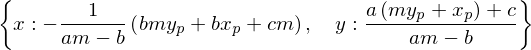

In [49]:
s.solve([e1,e2], x, y)

In [50]:
a,b,g,m = s.symbols("a b g m")

In [51]:
eq1 = s.Eq(a + b, 1 + m**2)
eq1

In [53]:
eq2 = s.Eq(a**2 + g**2, 1)
eq2

In [55]:
eq3 = s.Eq(b**2 + g**2, m**2)
eq3

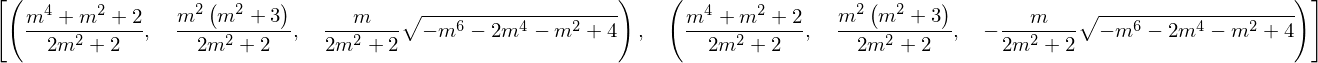

In [56]:
s.solve([eq1,eq2,eq3], a, b, g)